In [1]:
import random

import dipy.align
import numpy as np
import os
from scipy.ndimage import binary_dilation
from dipy.core.gradients import gradient_table
from dipy.io.gradients import read_bvals_bvecs
from dipy.io.image import load_nifti_data, load_nifti, save_nifti
from dipy.direction import peaks
from dipy.reconst import shm
from dipy.tracking import utils
from dipy.tracking.local_tracking import LocalTracking
from dipy.tracking.stopping_criterion import BinaryStoppingCriterion
from dipy.tracking.streamline import Streamlines
from dipy.align import resample

In [2]:
Base_Dir = os.path.join((os.path.expanduser("~")), 'Documents/Visual-Studio/Image-Processing/')
Output_Dir = os.path.join(Base_Dir, 'Archivos-Anteriores')

In [60]:
T1 = os.path.join(Output_Dir, 'extracted_images_folder_T1W3D_TFE_SENSE_20121109182752_701.nii')
DWI_S = os.path.join(Output_Dir, 'DFT-00002_singleComponent.nii')
DWI = os.path.join(Output_Dir, 'extracted_images_folder_DTI_high_iso_SENSE_20121109182752_1301.nii')
DWI_bvec = os.path.join(Output_Dir, 'extracted_images_folder_DTI_high_iso_SENSE_20121109182752_1301.bvec')
DWI_bvals = os.path.join(Output_Dir, 'extracted_images_folder_DTI_high_iso_SENSE_20121109182752_1301.bval')
Labels = os.path.join(Output_Dir, 'DFT-00002-aparc+aseg.nii.gz')
# Parcels = os.path.join(Output_Dir, 'parcels_dipy.nii')
Parcels = os.path.join(Output_Dir, 'DFT-00002_parcels.nii')
mask_path = os.path.join(Output_Dir, 'DFT-00002-brainmask.nii.gz')

In [53]:
from dipy.align import rigid
data, affine, hardi_img = load_nifti(DWI, return_img=True)
# labels, label_affine, label_voxsize = load_nifti(Labels, return_voxsize=True)
labels = resample(Labels, DWI_S)
parcels, parcels_affine = load_nifti(Parcels)
# parcels = resample(Parcels, DWI_S)
# t1_data = load_nifti_data(T1)
# t1_data = resample(T1, DWI_S).dataobj
bvals, bvecs = read_bvals_bvecs(DWI_bvals, DWI_bvec)
gtab = gradient_table(bvals, bvecs)

In [61]:
# mask = (labels.dataobj != 0)
mask = resample(mask_path, DWI_S)

In [ ]:
# print(mask2.shape)
print(mask3.shape)

In [ ]:
from dipy.align.reslice import reslice
new_zooms = (3.2,3.2,3.6571)
labels2, label_affine2 = reslice(labels, label_affine, label_voxsize, new_zooms, order=0)
print(labels2.shape)

In [ ]:
# newlabels = np.zeros(labels.shape, labels.dtype)
# indices = [1032, 1014, 1012, 1019, 1020, 1018, 1027, 1003, 1028, 1024, 1017, 1035, 1026, 1002, 1023, 1010, 1006, 1007, 1016, 1009, 1033, 1015, 1030, 1034, 1001, 1022, 1031, 1008, 1029, 1025, 1005, 1011, 1021, 1013, 11, 12, 13, 9, 10, 17, 18, 26, 28, 2032, 2014, 2012, 2019, 2020, 2018, 2027, 2003, 2028, 2024, 2017, 2035, 2026, 2002, 2023, 2010, 2006, 2007, 2016, 2009, 2033, 2015, 2030, 2034, 2001, 2022, 2031, 2008, 2029, 2025, 2005, 2011, 2021, 2013, 50, 51, 52, 48, 49, 53, 54, 58, 60]
# newlabels = np.where((labels == 2) | (labels == 41) | (labels == 77) | (labels == 85) |
#                      (labels == 1004) | (labels == 2004), 1, newlabels)
# newlabels = np.where((labels >= 251) & (labels <= 255), 2, newlabels)
# 
# for i in range(86):
#     newlabels = np.where((labels == indices[i]), i+3, newlabels)

In [ ]:
newlabels = np.zeros(labels.shape, np.uint8)

for i in range(1,4):
    newlabels = np.where((np.round(labels) == 1000+i), i, newlabels)
for i in range(4,35):
    newlabels = np.where((np.round(labels) == 1001+i), i, newlabels)
    
indices = [8, 10, 11, 12, 13, 17, 18, 26]

for i in range(35, 43):
    newlabels = np.where((np.round(labels) == indices[i-35]), i, newlabels)

for i in range(43, 49):
    newlabels = np.where((np.round(labels) == i+6), i, newlabels)

newlabels = np.where((np.round(labels) == 58), 49, newlabels)

for i in range(50, 53):
    newlabels = np.where((np.round(labels) == 1951+i), i, newlabels)
for i in range(53, 84):
    newlabels = np.where((np.round(labels) == 1952+i), i, newlabels)

newlabels = np.where((np.round(labels) == 47), 84, newlabels)

# newlabels = np.where((np.round(labels) == 2) | (np.round(labels) == 41) | (np.round(labels) == 77) | (np.round(labels) == 85) | (lnp.round(abels.dataobj )== 1004) | (np.round(labels) == 2004), 85, newlabels)
# newlabels = np.where((np.round(labels) >= 251) & (np.round(labels) <= 255), 86, newlabels)

In [ ]:
# newlabels2, newlabels2_affine = dipy.align.translation(Parcels, DWI_S)
newlabels2 = resample(moving=newlabels, static=DWI_S, moving_affine=label_affine)

In [ ]:
intlabels = np.zeros(newlabels2.shape, np.uint8)
for i in range(1, newlabels2.dataobj.max().astype(np.uint8) + 1):
    intlabels = np.where((newlabels2.dataobj==i), i, intlabels)

In [ ]:
# maskone = np.where(((newlabels2==1)^(np.round(newlabels2).astype(np.uint8)==1)), newlabels2, 0)
from dipy.align.reslice import reslice
maskone, maskone_affine = reslice(newlabels, label_affine, zooms=label_voxsize, new_zooms=(2,2,3.65714), order=0)
print(maskone.max())
print(maskone.shape)
print(np.min(maskone[np.nonzero(maskone)]))
# print(np.count_nonzero(parcels==1))
# print(np.count_nonzero(parcels.astype(np.uint8)==1))

In [ ]:
# save_nifti(os.path.join(Output_Dir, 'parcels_dipy2.nii'), parcels.dataobj, parcels.affine)
# save_nifti(os.path.join(Output_Dir, 'newlabels_dipy.nii'), np.round(newlabels2).astype(np.uint8), newlabels2_affine)
# save_nifti(os.path.join(Output_Dir, 'newlabels_dipy.nii'), np.round(labels2).astype(np.uint8), label_affine2)
# save_nifti(os.path.join(Output_Dir, 'plabels_dipy.nii'), np.round(maskone).astype(np.uint8), maskone_affine)
save_nifti(os.path.join(Output_Dir, 'pintlabels_dipy.nii'), newparcels, np.eye(4))

In [64]:
white_matter = (mask.dataobj != 0)
csamodel = shm.CsaOdfModel(gtab, 6)
csapeaks = peaks.peaks_from_model(model=csamodel,
                                  data=data,
                                  sphere=peaks.default_sphere,
                                  relative_peak_threshold=.8,
                                  min_separation_angle=45,
                                  mask=white_matter)

In [65]:
affine = np.eye(4)
seeds = utils.seeds_from_mask(white_matter, affine, density=1)
stopping_criterion = BinaryStoppingCriterion(white_matter)

streamline_generator = LocalTracking(csapeaks, stopping_criterion, seeds, return_all= False,
                                     affine=affine, step_size=0.5, maxlen=100)
streamlines = Streamlines(streamline_generator)

In [42]:
import random
cc_slice = (labels.dataobj != 0)
cc_streamlines = utils.target(streamlines, affine, cc_slice)
cc_streamlines = Streamlines(cc_streamlines)
# cc_streamlines = sorted(cc_streamlines, key=lambda x: random.random())
# cc_streamlines = cc_streamlines[:10000]

other_streamlines = utils.target(streamlines, affine, cc_slice,
                                 include=False)
other_streamlines = Streamlines(other_streamlines)
# assert len(other_streamlines) + len(cc_streamlines) == len(streamlines)
# cc_streamlines = [sl for sl in cc_streamlines if len(sl) > 1]

In [45]:
cc_streamlines2 = dipy.tracking.utils.transform_tracking_output(cc_streamlines, labels.affine)
cc_streamlines2 = Streamlines(cc_streamlines2)

In [51]:
from dipy.viz import window, actor, colormap as cmap

# Enables/disables interactive visualization
interactive = True

# Make display objects
color = cmap.line_colors(cc_streamlines2)
cc_streamlines_actor = actor.line(cc_streamlines2,
                                  cmap.line_colors(cc_streamlines2))
cc_ROI_actor = actor.contour_from_roi((mask!=0), color=(1., 1., 0.),
                                      opacity=0.5)

# vol_actor = actor.slicer(newlabels2.dataobj)
# 
# vol_actor.display(x=40)
# vol_actor2 = vol_actor.copy()
# vol_actor2.display(z=35)

# Add display objects to canvas
scene = window.Scene()
# scene.add(vol_actor)
# scene.add(vol_actor2)
scene.add(cc_streamlines_actor)
scene.add(cc_ROI_actor)
# 
# # Save figures
# window.record(scene, n_frames=1, out_path='corpuscallosum_axial.png',
#               size=(800, 800))
# if interactive:
#     window.show(scene)
# scene.set_camera(position=[-1, 0, 0], focal_point=[0, 0, 0], view_up=[0, 0, 1])
# window.record(scene, n_frames=1, out_path='corpuscallosum_sagittal.png',
#               size=(800, 800))
if interactive:
    window.show(scene)

In [48]:
print(sum(map(sum, M)))

500


In [10]:
from dipy.align import reslice
newparcels = dipy.align.reslice.affine_transform(parcels, np.linalg.inv(parcels_affine))

In [ ]:
intlabels_affine = np.matmul(parcels_affine, np.linalg.inv(labels.affine))
print((intlabels_affine))

In [46]:
M, grouping = utils.connectivity_matrix(cc_streamlines2, parcels_affine,
                                        parcels,
                                        inclusive=True,
                                        return_mapping=True,
                                        mapping_as_streamlines=True)
# M[:3, :] = 0
# M[:, :3] = 0
M[0, :] = 0
M[:, 0] = 0
# M[:, 84:] = 0
# M[84:, :] = 0
np.fill_diagonal(M, 0)

In [43]:
WholeArea = np.count_nonzero(mask)

In [31]:
M1 = np.copy(M)
WholeArea = np.count_nonzero(mask)
with np.nditer(M1, flags=['multi_index'], op_flags=["writeonly"]) as itM:
    for item in itM:
        node1Area = np.count_nonzero(parcels == itM.multi_index[0])
        node2Area = np.count_nonzero(parcels == itM.multi_index[1])
        item[...] = item / (node1Area/WholeArea + node2Area/WholeArea)
        if itM.multi_index[0] == itM.multi_index[1]:
            item[...] = 0

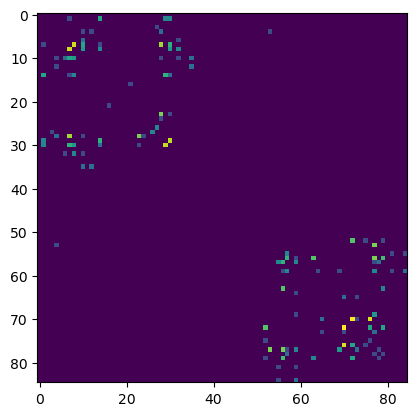

In [49]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(np.log1p(M), interpolation='nearest')
# plt.imshow(M1, interpolation='nearest')
plt.savefig("connectivity.png")

In [ ]:
from dipy.io.stateful_tractogram import Space, StatefulTractogram
from dipy.io.streamline import save_trk
sft = StatefulTractogram(cc_streamlines, hardi_img, Space.RASMM)
save_trk(sft, os.path.join(Output_Dir, "DFT_00002_dipy.trk"), streamlines)